In [41]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#plt.rcParams['figure.figsize'] = [15, 10]

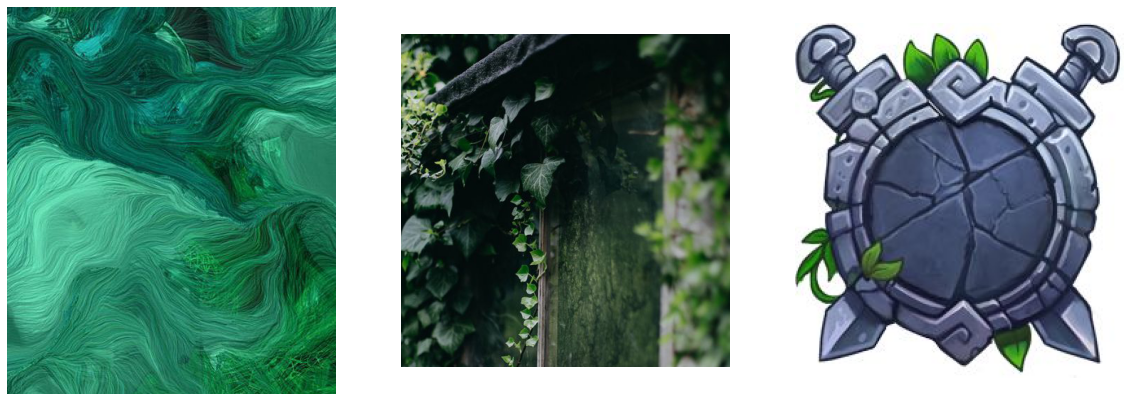

In [42]:
path = 'data/'
imgNames = ['Img01','Img02','Img03']

imgs = []
for i in imgNames:
    img = cv2.imread(path + i + '.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    
plt.rcParams['figure.figsize'] = [20, 20]
imgPos = 1
for i in imgs:
    plt.subplot(1,len(imgs), imgPos), plt.imshow(i)
    plt.axis(False)
    imgPos += 1

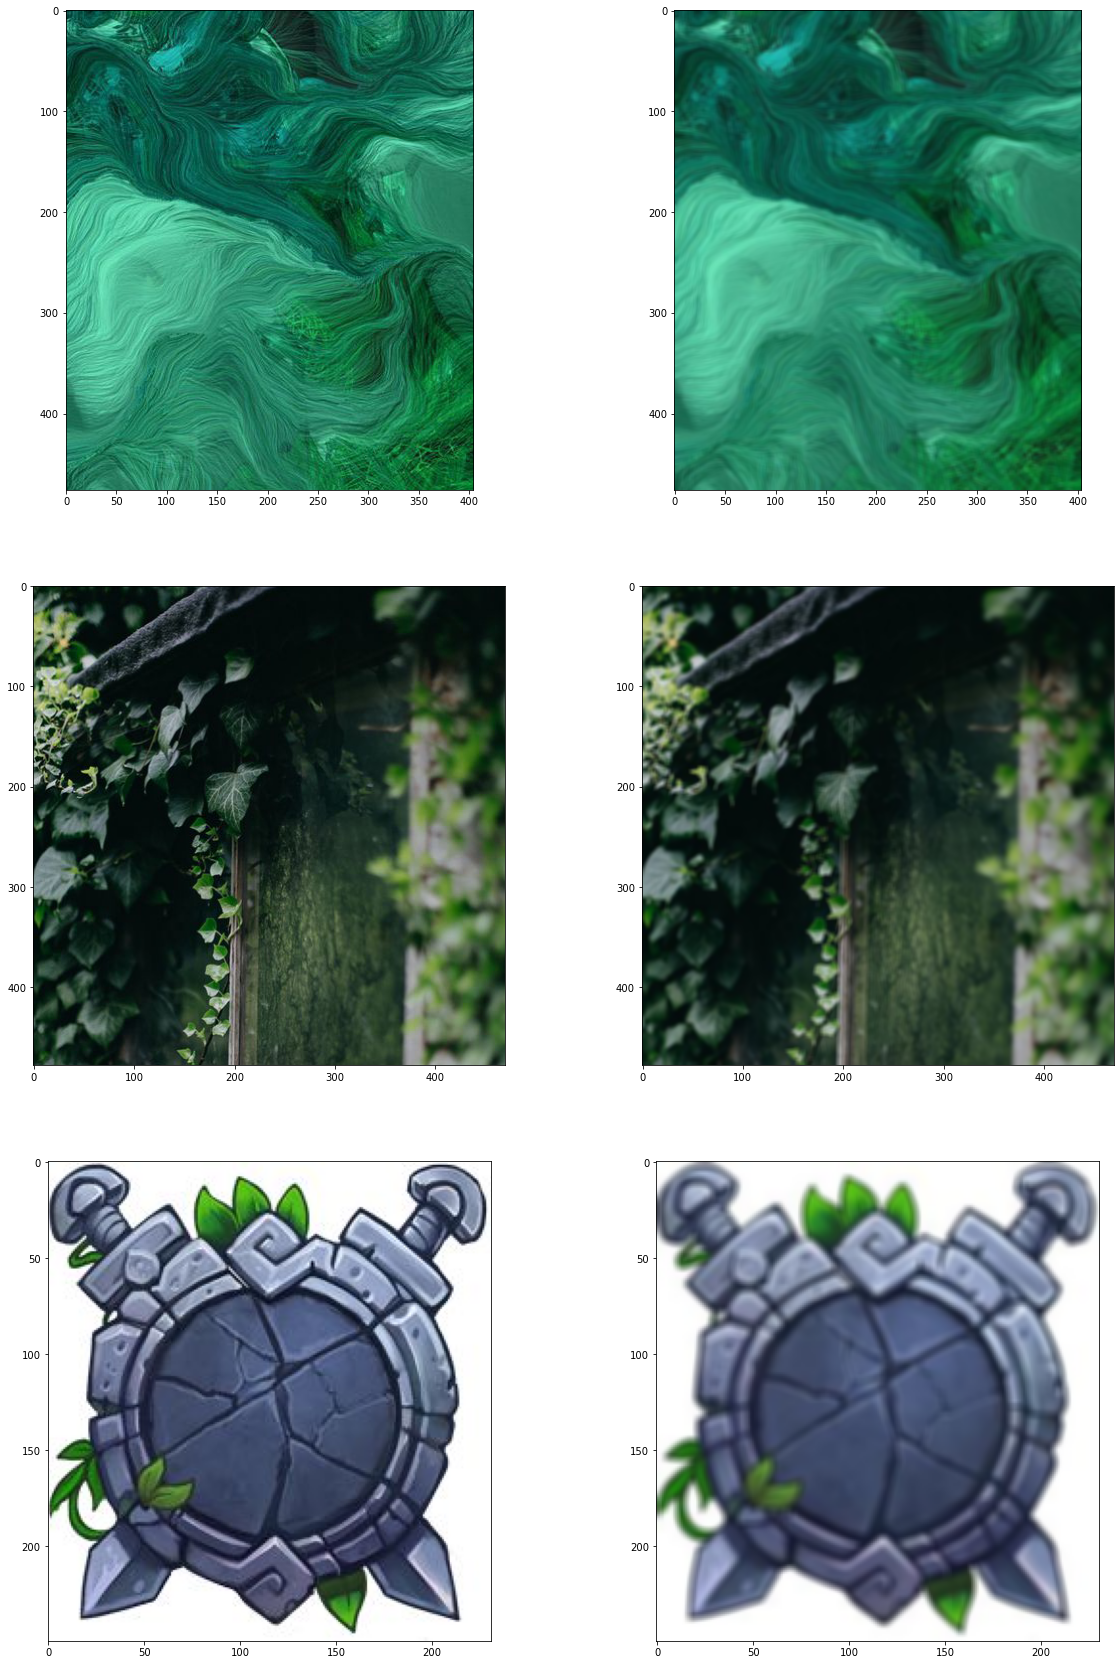

In [67]:
#blured image
bluredImgs = []
imgPos = 1
plt.rcParams['figure.figsize'] = [20, 30]
for i in imgs:
    blured = cv2.GaussianBlur(i, ksize=(5,5), sigmaX=5)
    bluredImgs.append(blured)
    
    plt.subplot(len(imgs), 2, imgPos), plt.imshow(i)
    plt.subplot(len(imgs), 2, imgPos + 1), plt.imshow(blured)
    imgPos += 2;

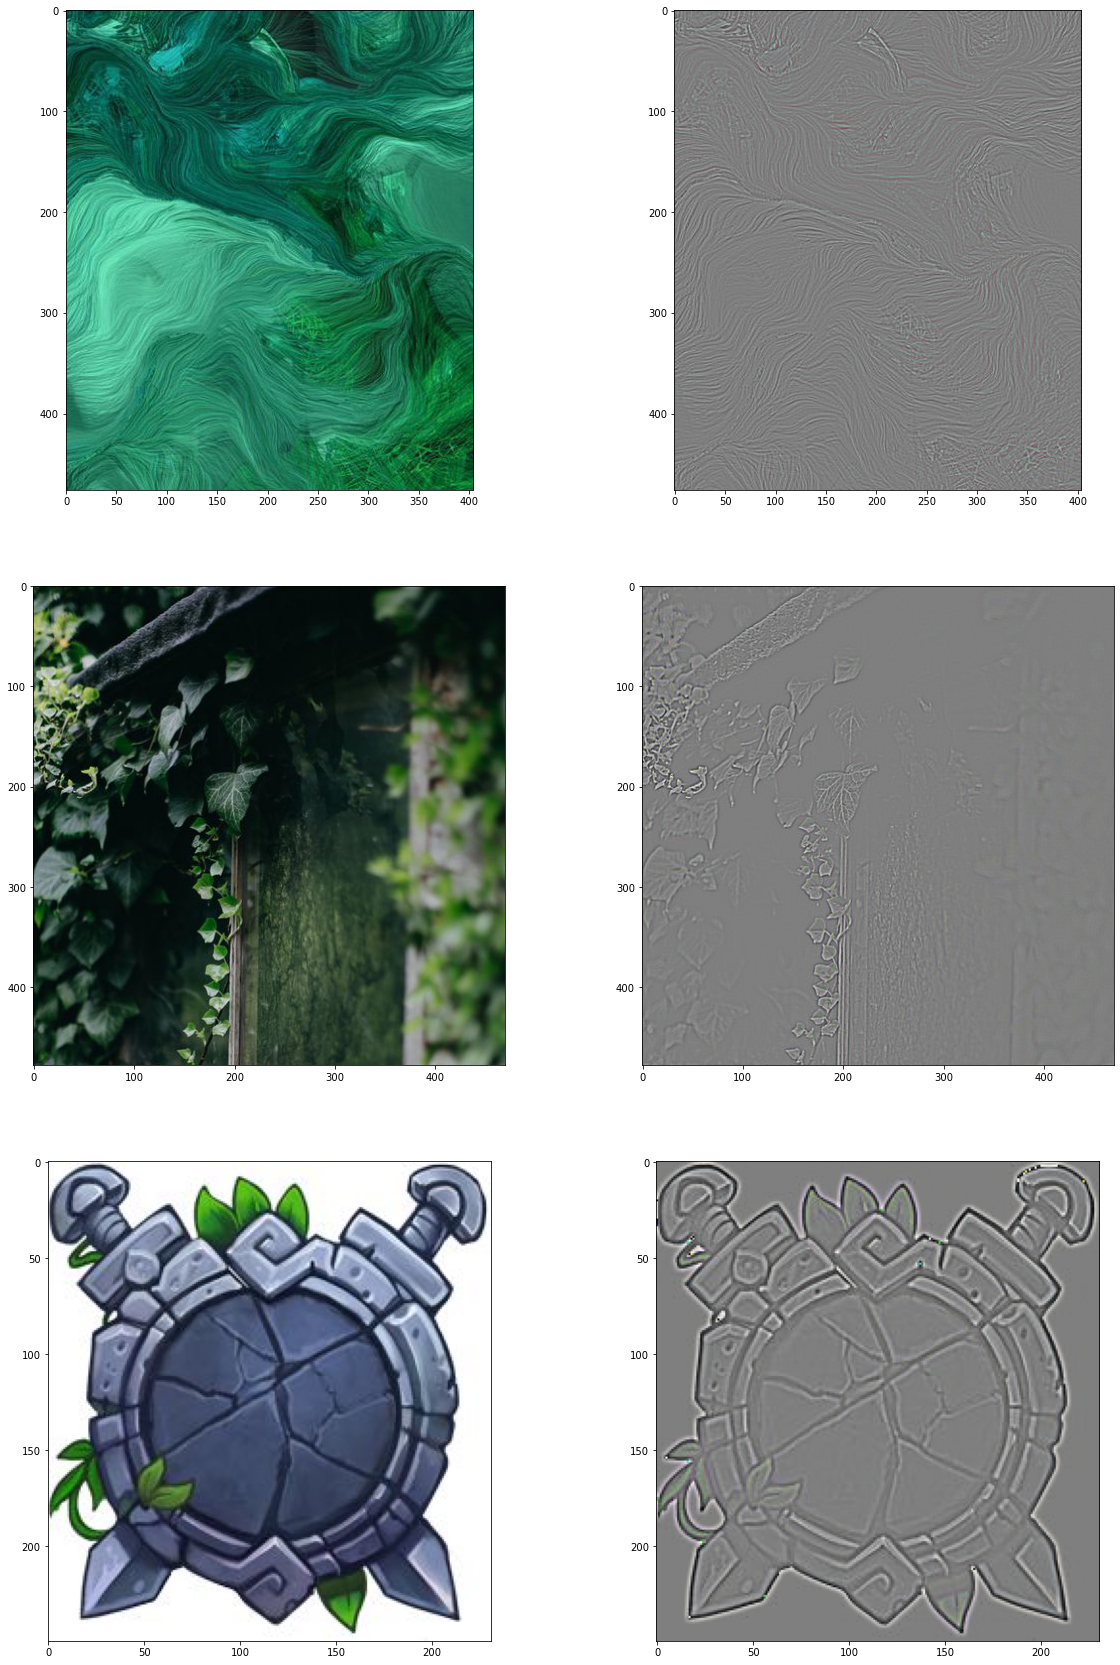

In [143]:
#difference
imgPos = 1
counter = 0
diffArr = []
plt.rcParams['figure.figsize'] = [20, 30]
for i in imgs:
    diff = i - bluredImgs[counter]
    diffArr.append(diff)

    display = diff + 127
    display[display > 255] = 255
    display[display < 0] = 0
    counter += 1
    
    plt.subplot(len(imgs), 2, imgPos), plt.imshow(i)
    plt.subplot(len(imgs), 2, imgPos + 1), plt.imshow(display)
    imgPos += 2;

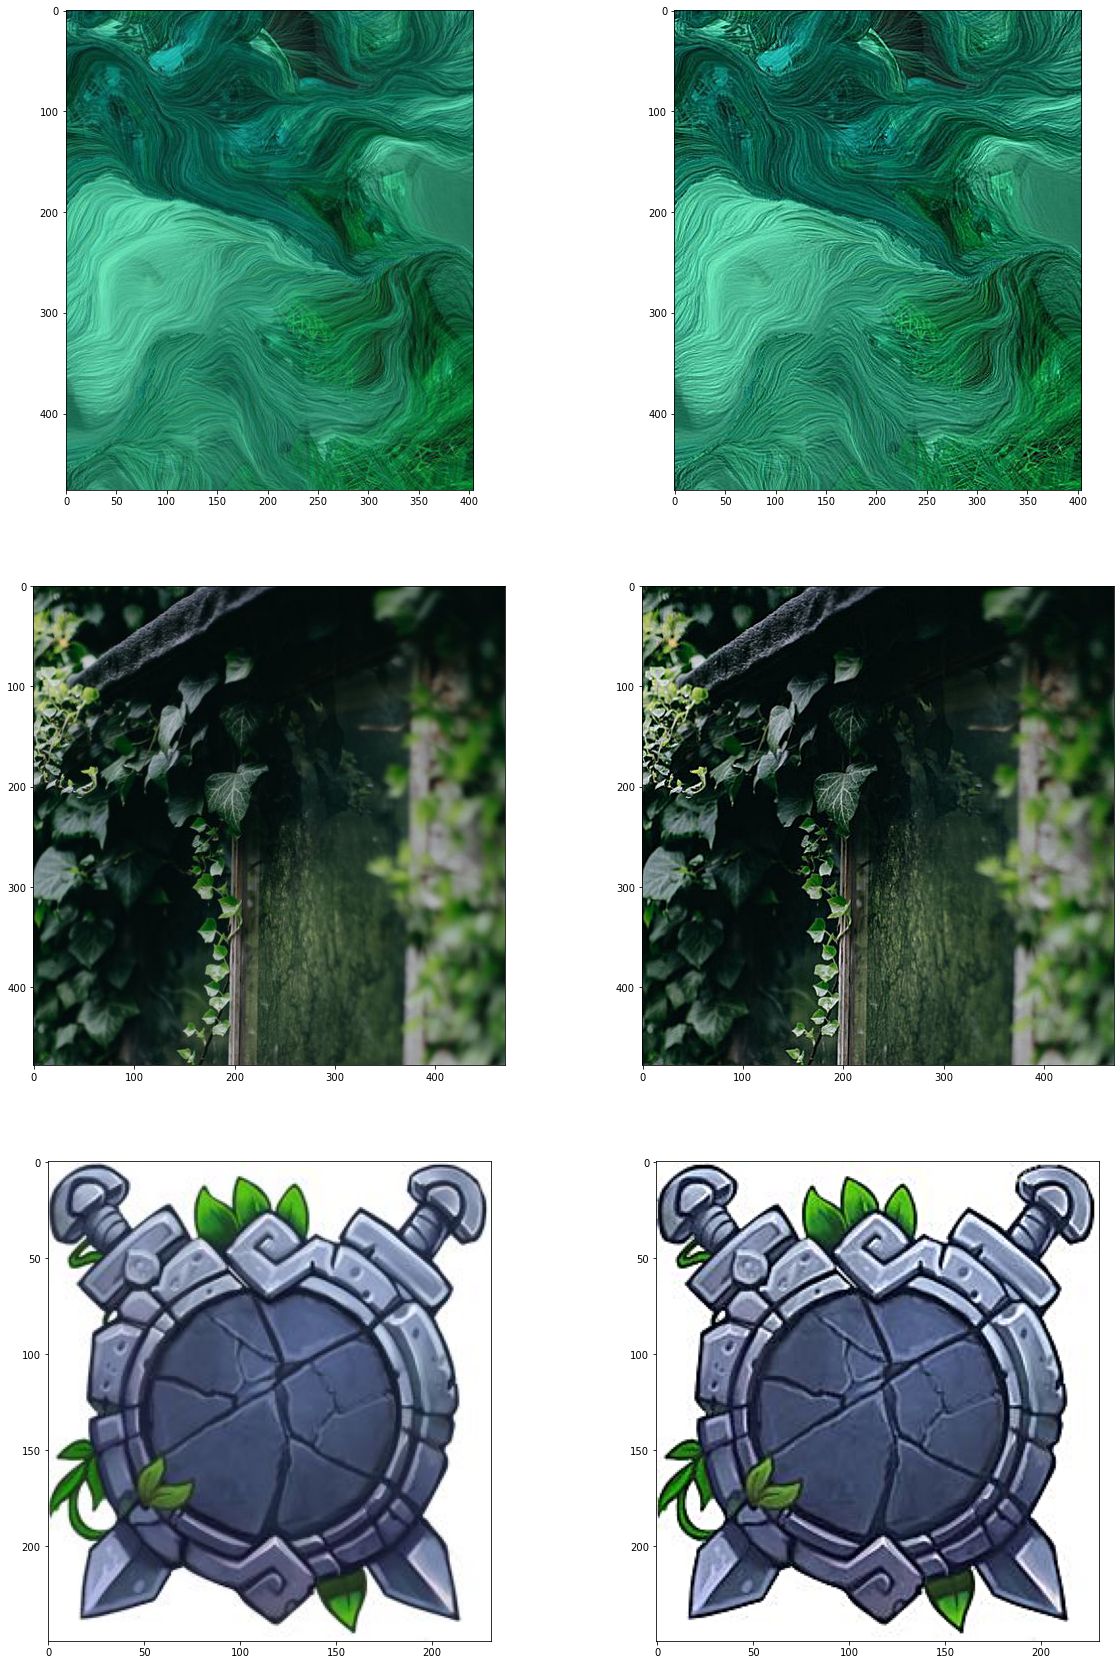

In [155]:
#result
amount = 0.7
imgPos = 1
counter = 0
plt.rcParams['figure.figsize'] = [20, 30]
for i in imgs:
    sharpened = ( (i + (diffArr[counter]).astype(np.int8) * amount) /255).astype(np.single)
    sharpened[sharpened > 1] = 1
    sharpened[sharpened < 0] = 0
    counter += 1
    
    plt.subplot(len(imgs), 2, imgPos), plt.imshow(i)
    plt.subplot(len(imgs), 2, imgPos + 1), plt.imshow(sharpened)
    imgPos += 2;
    

<b>1) What is a good (reasonable) value for the amount parameter?</b><br><br>
<i>The value that improves visual recognition of image.
    <br>For this case amount ~ 0.3-0.7 </i><br><br>
<b>2) What happens if it is too small?</b><br><br>
<i>The visual result seems same</i><br><br>
<b>3) What happens if it is too large?</b><br><br>
<i>It causes data loss(out of range values), and increases noise</i><br><br>

<h2>Thanks for viewing!</h2> ❤️️